In [11]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
import string
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [22]:
df = pd.read_csv('./datasets-2019/news/merged_data.csv')

In [26]:
df.head()

,URL,MatchDateTime,Station,Show,IAShowID,IAPreviewThumb,Snippet,Tokenized_Snippet
0,https://archive.org/details/FOXNEWSW_20190519_...,5/19/2019 15:59:08,FOXNEWS,MediaBuzz,FOXNEWSW_20190519_150000_MediaBuzz,https://archive.org/download/FOXNEWSW_20190519...,leftleaning british newspaper changing languag...,"[leftleaning, british, newspaper, changing, la..."
1,https://archive.org/details/FOXNEWSW_20190518_...,5/18/2019 4:30:00,FOXNEWS,Tucker Carlson Tonight,FOXNEWSW_20190518_040000_Tucker_Carlson_Tonight,https://archive.org/download/FOXNEWSW_20190518...,memorable segments show ever run debated engin...,"[memorable, segments, show, ever, run, debated..."
2,https://archive.org/details/FOXNEWSW_20190509_...,5/9/2019 21:40:16,FOXNEWS,The Five,FOXNEWSW_20190509_210000_The_Five,https://archive.org/download/FOXNEWSW_20190509...,ground sometimes muslim terrorist say gun cont...,"[ground, sometimes, muslim, terrorist, say, gu..."
3,https://archive.org/details/FOXNEWSW_20190506_...,5/6/2019 15:26:00,FOXNEWS,Americas Newsroom With Bill Hemmer and Sandra ...,FOXNEWSW_20190506_130000_Americas_Newsroom_Wit...,https://archive.org/download/FOXNEWSW_20190506...,painting dire picture future blaming man kinds...,"[painting, dire, picture, future, blaming, man..."
4,https://archive.org/details/FOXNEWSW_20190527_...,5/27/2019 2:10:30,FOXNEWS,Hannity Special,FOXNEWSW_20190527_020000_Hannity_Special,https://archive.org/download/FOXNEWSW_20190527...,conspiracy channel like roswell new mexico eve...,"[conspiracy, channel, like, roswell, new, mexi..."


In [23]:
stop_words = set(stopwords.words("english"))
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [24]:
df['Snippet'] = df['Snippet'].apply(preprocess_text)

In [25]:
df['Tokenized_Snippet'] = df['Snippet'].apply(lambda x: word_tokenize(x))


In [29]:
model = Word2Vec(df['Tokenized_Snippet'], vector_size=100, window=5, min_count=10, sg=0)
# Parameters:
# - vector_size: Number of dimensions for word vectors.
# - window: Maximum distance between the current and predicted word within a sentence.
# - min_count: Ignores all words with a total frequency lower than this.
# - sg: Training algorithm. sg=0 for CBOW, sg=1 for Skip-gram.

In [ ]:
word_vectors = model.wv

# Select a subset of words you want to visualize (e.g., top 100 words)
words_to_visualize = list(word_vectors.index_to_key[:200])

# Get the word vectors for the selected words and convert to a NumPy array
vectors = np.array([word_vectors[word] for word in words_to_visualize])

In [ ]:
# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2D = tsne.fit_transform(vectors)

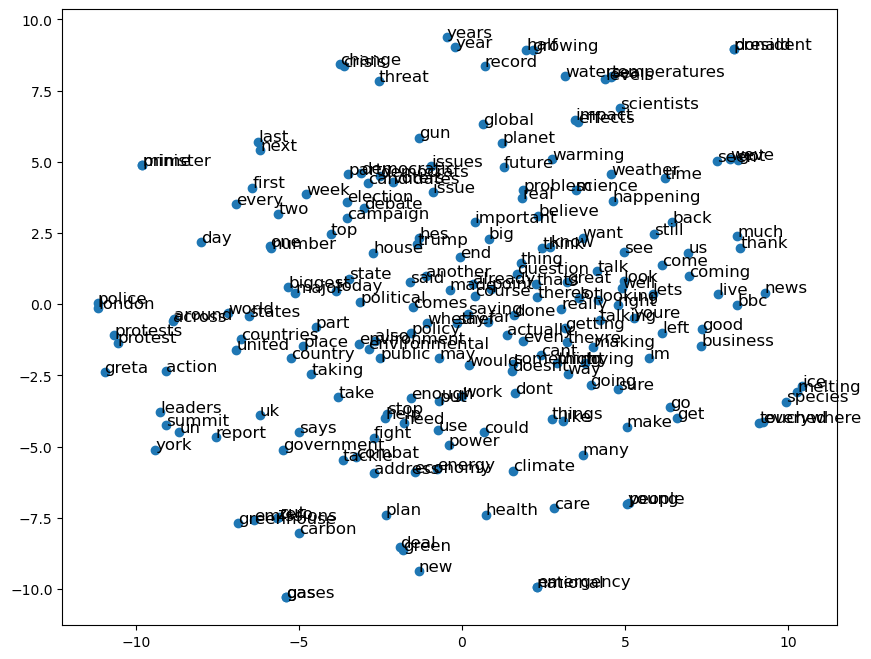

In [31]:
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2D[:, 0], word_vectors_2D[:, 1])

for i, word in enumerate(words_to_visualize):
    plt.annotate(word, xy=(word_vectors_2D[i, 0], word_vectors_2D[i, 1]), size=12)

plt.show()

In [33]:
tsne3D = TSNE(n_components=3, random_state=42)
word_vectors_3D = tsne3D.fit_transform(vectors)

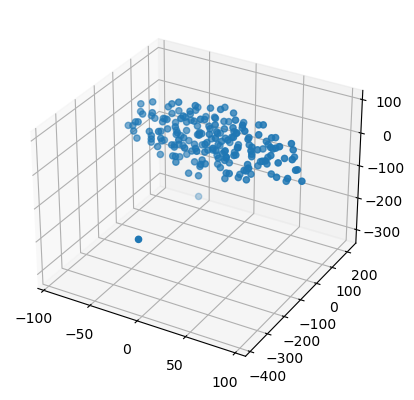

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(word_vectors_3D[:, 0], word_vectors_3D[:, 1], word_vectors_3D[:, 2])
plt.show()

In [35]:
import plotly.express as px


In [36]:
df_tsne_3d = pd.DataFrame(data=word_vectors_3D, columns=['Dimension1', 'Dimension2', 'Dimension3'])


In [52]:
fig_3d = px.scatter_3d(df_tsne_3d, x='Dimension1', y='Dimension2', z='Dimension3', text=words_to_visualize)
fig_3d.update_layout(width=1000, height=1000, scene=dict(bgcolor='black'))
fig_3d.update_traces(marker=dict(size=3, color='green'), textfont_color='grey') 
fig_3d.update_layout(scene=dict(
    xaxis=dict(showbackground=True, backgroundcolor='black', showgrid=False), 
    yaxis=dict(showbackground=True, backgroundcolor='black', showgrid=False),
    zaxis=dict(showbackground=True, backgroundcolor='black', showgrid=False), 
))
fig_3d.show()
